In [31]:
import skimage
import skimage.io
import skimage.transform
import pathlib
import numpy as np
import utils
import matplotlib.pyplot as plt
image_dir = pathlib.Path("images")
impaths = [
    image_dir.joinpath("page1.png"),
    image_dir.joinpath("page2.png"),
    image_dir.joinpath("page4.png"),
    image_dir.joinpath("page6.png"),
    image_dir.joinpath("page7.png"),
    image_dir.joinpath("page8.png"),
]

In [32]:
def create_binary_image(im):
    """Creates a binary image from a greyscale image "im"

    Args:
        im ([np.ndarray, np.float]): [An image of shape [H, W] in the range [0, 1]]

    Returns:
        [np.ndarray, bool]: [A binary image]
    """

    # START YOUR CODE HERE ### (You can change anything inside this block)
    im_fft = np.fft.fft2(im)
    im_fft_shifted = np.fft.fftshift(im_fft)

    magnitude_spectrum = np.abs(im_fft_shifted)
    
    threshold = 10
    binary_im = magnitude_spectrum > threshold


    return binary_im

Found angle: -21.81
Found angle: 90.00
Found angle: 26.82
Found angle: -25.82
Found angle: -67.44
Found angle: 90.00
Saving image to: image_processed/task4d.png


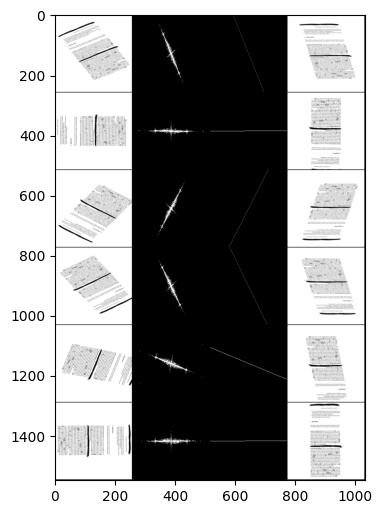

In [33]:
if __name__ == "__main__":
    # NO NEED TO EDIT THE CODE BELOW.
    verbose = True
    plt.figure(figsize=(4, 12))    
    plt.tight_layout()
    images_to_visualize = []
    for i, impath in enumerate(impaths):
        im = utils.read_im(str(impath))
        im_binary = create_binary_image(im)
        assert im_binary.dtype == bool,\
            f"Expected the image to be of dtype bool, got {im_binary.dtype}"
        angles, distances = utils.find_angle(im_binary)
        angle = 0
        if len(angles) > 0:
            angle = angles[0] * 180 / np.pi
        print(f"Found angle: {angle:.2f}")
        hough_im = utils.create_hough_line_image(im, angles, distances)
        rotated = skimage.transform.rotate(im, angle, cval=im.max())
        images_to_visualize.extend(
            [im, im_binary, hough_im, rotated]
        )
    image = utils.np_make_image_grid(images_to_visualize, nrow=len(impaths))
    utils.save_im("task4d.png", image)
    plt.imshow(image, cmap="gray")